In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
X, y = make_moons(n_samples = 1000, noise = 0.2, random_state = 33)

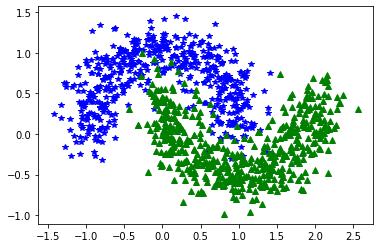

In [3]:
plt.plot(X[y == 0, 0], X[y == 0, 1], 'b*')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')

In [4]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard'
)

# voting_clf.fit(X, y)

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [7]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.88
RandomForestClassifier 0.9675
SVC 0.9775
VotingClassifier 0.9725


In [8]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability = True)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rnd', rnd_clf), ('svm', svm_clf)],
    voting = 'soft',
)

# voting_clf.fit(X_train, y_train)

In [9]:
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.88
RandomForestClassifier 0.965
SVC 0.9775
VotingClassifier 0.9675


In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples = 100, bootstrap = True, n_jobs = -1
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [12]:
y_pred = bag_clf.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

0.9725

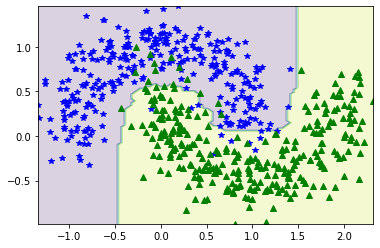

In [14]:
x0, x1 = np.meshgrid(
    np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),
    np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_pred = bag_clf.predict(X_new).reshape(x0.shape)
y_prob = bag_clf.predict_proba(X_new)[:, 0].reshape(x0.shape)

plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'b*')
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'g^')

plt.contourf(x0, x1, y_pred, alpha = 0.2)

In [15]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    bootstrap = True, n_jobs = -1, oob_score = True
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [16]:
bag_clf.oob_score_

0.9516666666666667

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9525

In [19]:
bag_clf.oob_decision_function_

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       ...,
       [0.00540541, 0.99459459],
       [0.9673913 , 0.0326087 ],
       [1.        , 0.        ]])

### Random Patches method

bug_clf = BaggingClassifier(bootstrap = False, max_samples = 1.0, bootstrap_features = True, max_features = 0.9)
                           
### Random Subspaces method

bug_clf = BaggingClassifier(bootstrap_features = True, max_features = 0.9)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16,
                                n_jobs = -1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [22]:
rnd_clf.score(X_test, y_test)

0.9675

In [23]:
y_pred = rnd_clf.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.9675

<h6>The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best featrue among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. The following BaggingClassifier is roughly equivalent to the previous RandomForestClassifier:</h6>

<i>bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter = 'random', max_leaf_nodes = 16),
    n_estimators = 500, max_samples = 1.0, bootstrap = True, n_jobs = -1
)</i>

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [26]:
params = {'n_estimators': 500, 'max_depth': 20, 'max_leaf_nodes': 20,
         'n_jobs': -1}

In [27]:
extra_clf = ExtraTreesClassifier(**params)
forest_clf = RandomForestClassifier(**params)

extra_clf.fit(X_train, y_train)
forest_clf.fit(X_train, y_train)

print(extra_clf.score(X_test, y_test))
print(extra_clf.score(X_test, y_test))

0.9675
0.9675


In [28]:
forest_clf.feature_importances_

array([0.46510216, 0.53489784])

In [29]:
extra_clf.feature_importances_

array([0.44726799, 0.55273201])

In [30]:
from sklearn.datasets import load_iris

In [31]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [32]:
params = {'max_depth': 7, 'max_leaf_nodes': 8, 'n_jobs': -1,
         'n_estimators': 30}

In [33]:
forest_clf = RandomForestClassifier(**params)
extra_clf = ExtraTreesClassifier(**params)

forest_clf.fit(X_train, y_train)
extra_clf.fit(X_train, y_train)

print(forest_clf.score(X_test, y_test))
print(extra_clf.score(X_test, y_test))

0.9333333333333333
0.8888888888888888


In [34]:
for clf in [forest_clf, extra_clf]:
    print(clf.__class__.__name__)
    for name, importance in zip(iris.feature_names, clf.feature_importances_):
        print(name, ':', importance)
    print()

RandomForestClassifier
sepal length (cm) : 0.09532597156670228
sepal width (cm) : 0.042232607271709036
petal length (cm) : 0.4223486712021164
petal width (cm) : 0.4400927499594724

ExtraTreesClassifier
sepal length (cm) : 0.07244956094617447
sepal width (cm) : 0.054612843618684126
petal length (cm) : 0.4327316111209556
petal width (cm) : 0.44020598431418584



In [35]:
from sklearn.datasets import load_digits

In [36]:
digit = load_digits()

In [37]:
X = digit.data
y = digit.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

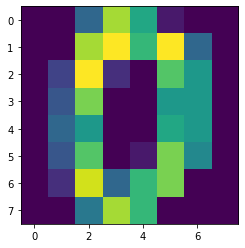

In [38]:
plt.imshow(X[0].reshape(8, 8))

In [39]:
forest_clf = RandomForestClassifier(n_estimators = 20, max_features = 50,
                                   max_leaf_nodes = 30, max_depth = 20)
forest_clf.fit(X_train, y_train)

forest_clf.score(X_test, y_test)

0.9185185185185185

In [40]:
feat_imp = forest_clf.feature_importances_

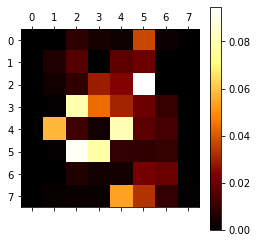

In [41]:
plt.matshow(feat_imp.reshape(8, 8), cmap = plt.get_cmap('afmhot'))
plt.colorbar()

In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
X, y = make_moons(noise = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [44]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1),
    n_estimators = 200,
    algorithm = 'SAMME.R', learning_rate = 0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [45]:
ada_clf.score(X_test, y_test)

0.85

In [46]:
X = 2*np.random.rand(150, 1)
y = 3*X+5+np.random.rand(150, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34)

X_range = np.linspace(X_train.min(), X_train.max(), 200).reshape(200, 1)

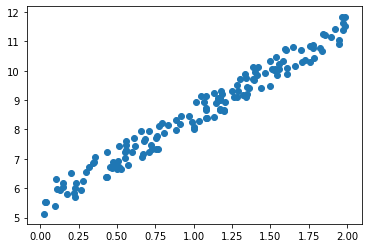

In [47]:
plt.scatter(X, y)

In [48]:
def plot_decision_graph(regressor, y_next = None):
    print('Predict training data :')
    plt.scatter(X_train, y_train)
    plt.plot(X_train, regressor.predict(X_train), 'go')
    plt.show()
    print('Decision Line with X_range :')
    plt.scatter(X_train, y_train)
    plt.plot(X_range, regressor.predict(X_range), 'r-')
    plt.show()
    print('Training y - predicted y :')
    plt.scatter(X_train, y_train)
    plt.plot(X_train, y_next, 'c*')
    plt.show()
    print('Test data')
    plt.plot(X_test, y_test, 'co')
    plt.plot(X_test, regressor.predict(X_test), 'b*')

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
tree_reg1 = DecisionTreeRegressor(max_depth = 2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [51]:
y2 = y_train - tree_reg1.predict(X_train).reshape(-1, 1)

Predict training data :


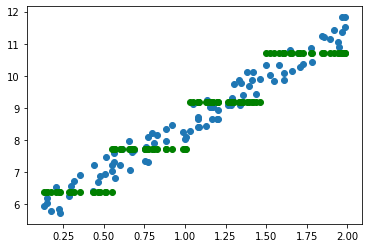

Decision Line with X_range :


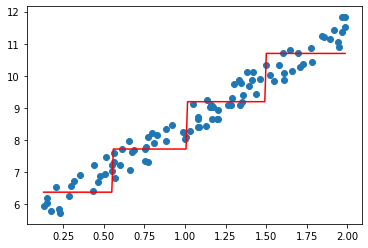

Training y - predicted y :


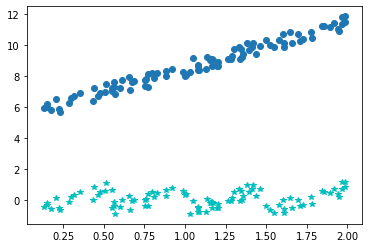

Test data


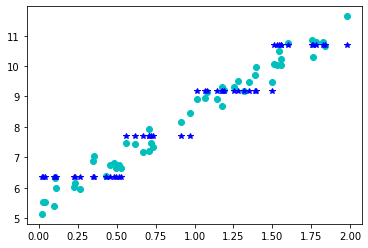

In [52]:
plot_decision_graph(tree_reg1, y2)

In [53]:
tree_reg2 = DecisionTreeRegressor(max_depth = 2)
tree_reg2.fit(X_train, y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [54]:
y3 = y2 - tree_reg2.predict(X_train).reshape(-1, 1)

Predict training data :


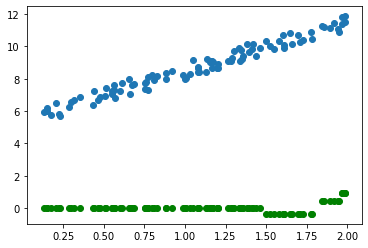

Decision Line with X_range :


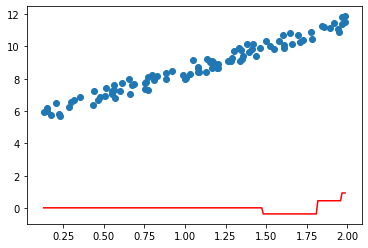

Training y - predicted y :


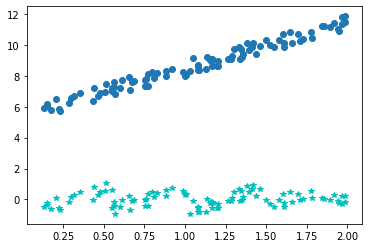

Test data


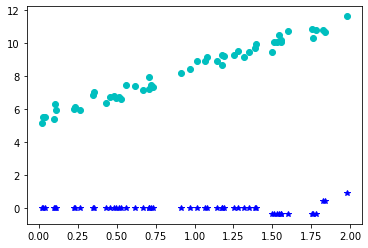

In [55]:
plot_decision_graph(tree_reg2, y3)

In [56]:
tree_reg3 = DecisionTreeRegressor()
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Predict training data :


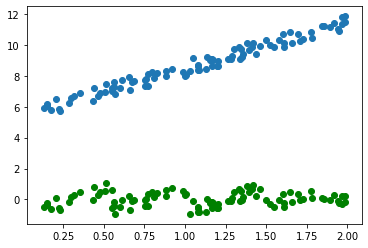

Decision Line with X_range :


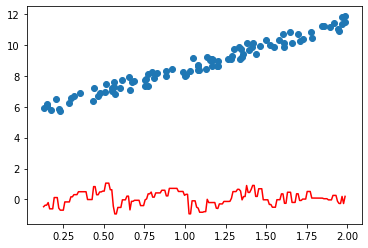

Training y - predicted y :


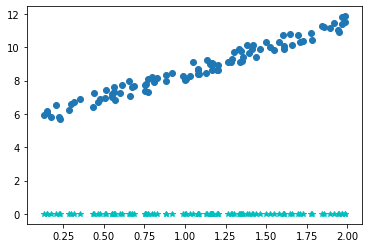

Test data


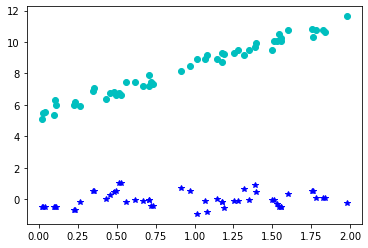

In [57]:
plot_decision_graph(tree_reg3, y3 - tree_reg3.predict(X_train).reshape(-1, 1))

In [58]:
y_pred = sum(tree.predict(X_test[4: 5]) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [59]:
print(y_test[4], y_pred)

[9.3155389] [9.08946679]


In [60]:
y_pred = []

for i in X_test:
    y_pred.append(sum(tree.predict([i]) for tree in (tree_reg1, tree_reg2, tree_reg3)))
    
y_pred = np.array(y_pred)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred.ravel()))
score = r2_score(y_test, y_pred.ravel())

print(rmse, score)

0.4046507716206778 0.9475016322124857


In [63]:
for i, j in enumerate(X_test[:10]):
    print(y_test[i], sum(tree.predict([j]) for tree in (tree_reg1, tree_reg2, tree_reg3)))

[5.38449627] [5.92547368]
[10.22491921] [9.84550843]
[6.3766198] [6.38947351]
[9.48897445] [8.8212275]
[9.3155389] [9.08946679]
[10.48205326] [9.84550843]
[10.84423526] [10.86461986]
[5.97879619] [5.92547368]
[9.46195975] [9.19290792]
[7.34337507] [7.34274685]


In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, learning_rate = 1.0)
gbrt.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [66]:
gbrt.score(X_test, y_test)

0.93037031355923

In [67]:
y_pred = gbrt.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
1-rmse

0.5339798535065307

In [68]:
X = 6*np.random.rand(200, 1)-6
y = 0.5*X**2+3*X+5+np.random.rand(200, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

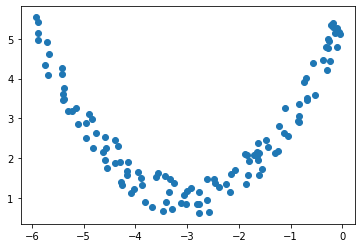

In [69]:
plt.scatter(X_train, y_train)

In [70]:
X_range = np.linspace(X_train.min(), X_train.max(), len(y_train)).reshape(-1, 1)

y_prev_pred = np.zeros((len(y_train), 1))

def plot_decision_line(ax, reg):
    global y_prev_pred
    y_prev_pred += reg.predict(X_range).reshape(-1, 1)
    
    ax.scatter(X_train, y_train)
    ax.plot(X_range, y_prev_pred, 'red')

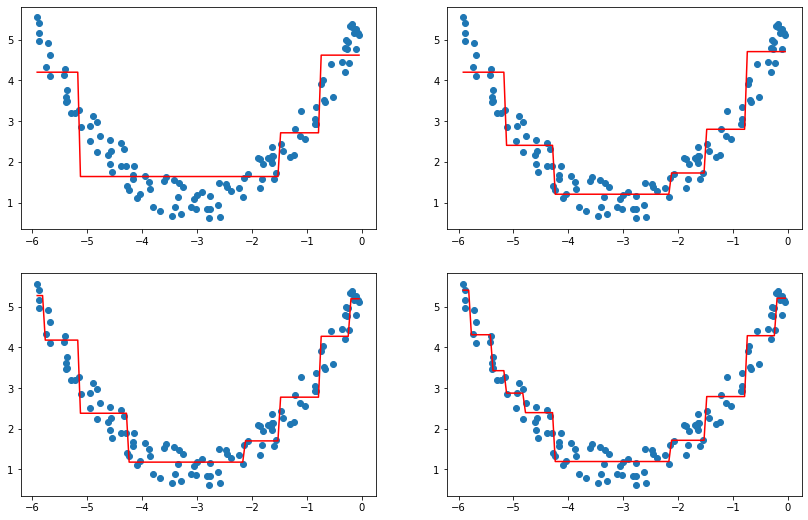

In [71]:
fig = plt.figure(figsize = (14, 9))

y_train_ = y_train

regs = []

for i in range(1, 5):
    tree_reg = DecisionTreeRegressor(max_depth = 3, max_leaf_nodes = 4)
    tree_reg.fit(X_train, y_train_)
    
    y_pred = tree_reg.predict(X_train).reshape(-1, 1)
    y_train_ = y_train_ - y_pred
    
    ax = fig.add_subplot(2, 2, i)
    plot_decision_line(ax, tree_reg)
    
    regs.append(tree_reg)

In [72]:
y_pred1 = regs[0].predict(X_test)
y_pred2 = regs[1].predict(X_test)
y_pred3 = regs[2].predict(X_test)
y_pred4 = regs[3].predict(X_test)

In [73]:
r2_score(y_test, y_pred1+y_pred2+y_pred3+y_pred4)

0.91788312915291

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
gbrt = GradientBoostingRegressor(max_leaf_nodes = 4, max_depth = 3, learning_rate = 0.8)
gbrt.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.8, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=4,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
gbrt.score(X_test, y_test)

0.8892945023061366

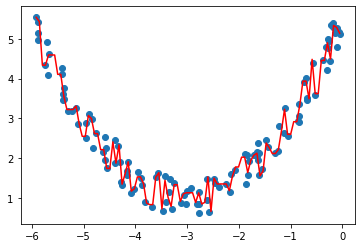

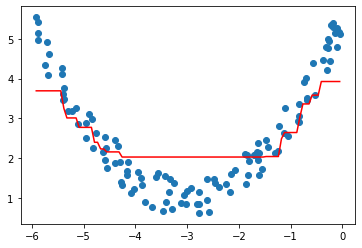

In [77]:
for i in [1.3, 0.01]:
    gbrt = GradientBoostingRegressor(max_leaf_nodes = 3, max_depth = 3,
                                     learning_rate = i)
    gbrt.fit(X_train, y_train.ravel())
    
    plt.scatter(X_train, y_train)
    
    X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
    y_pred = gbrt.predict(X_range)
    
    plt.plot(X_range, y_pred, 'red')
    plt.show()

In [78]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [80]:
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 120)
gbrt.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]

In [82]:
bst_n_estimators = np.argmin(errors)
bst_n_estimators

48

In [83]:
gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators = bst_n_estimators)
gbrt_best.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=48,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
min_error = np.min(errors)
min_error

0.12777290777089323

Text(0.5, 1.0, 'Best model (48 trees)')

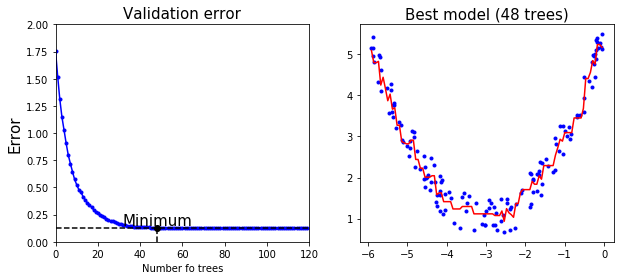

In [85]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.plot(errors, 'b.-')
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], 'k--')
plt.plot([0, 120], [min_error, min_error], 'k--')
plt.plot(bst_n_estimators, min_error, 'ko')
plt.text(bst_n_estimators, min_error*1.2, 'Minimum', ha = 'center', fontsize = 15)
plt.axis([0, 120, 0, 2])
plt.xlabel('Number fo trees')
plt.ylabel('Error', fontsize = 15)
plt.title('Validation error', fontsize = 15)

plt.subplot(1, 2, 2)
plt.plot(X_train, y_train, 'b.')
X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
y_pred = gbrt.predict(X_range)
plt.plot(X_range, y_pred, 'red')
plt.title('Best model (%d trees)'%bst_n_estimators, fontsize = 15)

In [86]:
gbrt = GradientBoostingRegressor(max_depth = 10, warm_start = True,
                                random_state = 34)
min_val_error = float('inf')
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train.ravel())
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test.ravel(), y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_goint_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

In [87]:
print(gbrt.n_estimators)

45


In [88]:
print('Minimum validation MSE:', min_val_error)

Minimum validation MSE: 0.17591922097783252


In [92]:
gbrt = GradientBoostingRegressor(max_depth = 3, max_leaf_nodes = 5,
                                subsample = 0.33)
gbrt.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=5,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.33, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
gbrt.score(X_test, y_test)

0.9367133580731062

In [95]:
from sklearn.model_selection import GridSearchCV

In [97]:
gbrt = GradientBoostingRegressor()
grid_model = GridSearchCV(gbrt,
                         param_grid = {
                             'max_depth': [2, 3, 4],
                             'max_leaf_nodes': [4, 5, 6],
                             'subsample': [0.20, 0.25, 0.33]
                         })
grid_model.fit(X_train, y_train.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [98]:
grid_model.cv_results_

{'mean_fit_time': array([0.02388372, 0.02499399, 0.02187014, 0.02186995, 0.02186985,
        0.02499404, 0.02186947, 0.0218699 , 0.02756243, 0.02499399,
        0.02467637, 0.02186871, 0.02619586, 0.02372222, 0.02386932,
        0.02499394, 0.02590137, 0.02189479, 0.02187018, 0.02499371,
        0.02499456, 0.025142  , 0.02499418, 0.02186995, 0.02187004,
        0.02450976, 0.02500029]),
 'std_fit_time': array([0.00468757, 0.00765374, 0.00765376, 0.00765333, 0.00765331,
        0.00765407, 0.00765197, 0.00765483, 0.00697734, 0.00765345,
        0.00989214, 0.00765181, 0.00589447, 0.00944303, 0.0065229 ,
        0.00765205, 0.00855538, 0.0059345 , 0.00765119, 0.00765214,
        0.00765606, 0.00966368, 0.00765166, 0.00765119, 0.00765549,
        0.01041939, 0.00765733]),
 'mean_score_time': array([0.00059977, 0.        , 0.        , 0.        , 0.00312424,
        0.        , 0.00312467, 0.        , 0.        , 0.        ,
        0.00020018, 0.00312529, 0.00019941, 0.        , 0.000199

In [115]:
params = grid_model.cv_results_.get('params')
scores = grid_model.cv_results_.get('mean_test_score')

for param, score in zip(params, scores):
    print(param, score)

{'max_depth': 2, 'max_leaf_nodes': 4, 'subsample': 0.2} 0.9385681576483742
{'max_depth': 2, 'max_leaf_nodes': 4, 'subsample': 0.25} 0.9381844257350552
{'max_depth': 2, 'max_leaf_nodes': 4, 'subsample': 0.33} 0.9392575625431888
{'max_depth': 2, 'max_leaf_nodes': 5, 'subsample': 0.2} 0.9375702648505865
{'max_depth': 2, 'max_leaf_nodes': 5, 'subsample': 0.25} 0.9377551687681723
{'max_depth': 2, 'max_leaf_nodes': 5, 'subsample': 0.33} 0.9344052599639475
{'max_depth': 2, 'max_leaf_nodes': 6, 'subsample': 0.2} 0.9402444761699289
{'max_depth': 2, 'max_leaf_nodes': 6, 'subsample': 0.25} 0.935628368886098
{'max_depth': 2, 'max_leaf_nodes': 6, 'subsample': 0.33} 0.9353549143345627
{'max_depth': 3, 'max_leaf_nodes': 4, 'subsample': 0.2} 0.9357589896718205
{'max_depth': 3, 'max_leaf_nodes': 4, 'subsample': 0.25} 0.9390014518816562
{'max_depth': 3, 'max_leaf_nodes': 4, 'subsample': 0.33} 0.9365109416254846
{'max_depth': 3, 'max_leaf_nodes': 5, 'subsample': 0.2} 0.9402235865586052
{'max_depth': 3, '

### XGBoost

In [117]:
import xgboost

In [118]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)

[10:45:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [119]:
y_pred = xgb_reg.predict(X_test)

In [121]:
r2_score(y_test, y_pred)

0.9307464565636452

In [122]:
xgb_reg.score(X_test, y_test)

0.9307464565636452

In [123]:
mse = mean_squared_error(y_test, y_pred)

In [124]:
np.sqrt(mse)

0.36419044769269815

In [126]:
from sklearn.metrics import mean_absolute_error

In [127]:
mean_absolute_error(y_test, y_pred)

0.30232781984961643

In [130]:
xgb_reg.fit(X_train, y_train, eval_set = [(X_test, y_test)],
            early_stopping_rounds = 2)

[10:49:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.13035
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:1.93954
[2]	validation_0-rmse:1.7657
[3]	validation_0-rmse:1.60161
[4]	validation_0-rmse:1.4621
[5]	validation_0-rmse:1.33972
[6]	validation_0-rmse:1.22944
[7]	validation_0-rmse:1.1268
[8]	validation_0-rmse:1.03716
[9]	validation_0-rmse:0.955773
[10]	validation_0-rmse:0.882159
[11]	validation_0-rmse:0.81454
[12]	validation_0-rmse:0.756778
[13]	validation_0-rmse:0.707389
[14]	validation_0-rmse:0.660466
[15]	validation_0-rmse:0.623049
[16]	validation_0-rmse:0.58529
[17]	validation_0-rmse:0.555927
[18]	validation_0-rmse:0.52667
[19]	validation_0-rmse:0.504457
[20]	validation_0-rmse:0.482267
[21]	validation_0-rmse:0.465438
[22]	validation_0-rmse:0.450816
[23]	validation_0-rmse:0.434658
[24]	validation_0-rmse:0.421697
[25]	validation_0-rmse:0.409592
[26]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [131]:
xgb_reg.score(X_test, y_test)

0.9338223343632638

In [132]:
y_pred = xgb_reg.predict(X_test)

In [133]:
r2_score(y_test, y_pred)

0.9338223343632638

In [134]:
mse = mean_squared_error(y_test, y_pred)

In [135]:
np.sqrt(mse)

0.3560108817028517

In [136]:
mean_absolute_error(y_test, y_pred)

0.28905643280463145